In [1]:
import pandas as pd
import dtale
import seaborn as sns

In [2]:
train = pd.read_csv(r'../../data/train.csv', sep=',')
train.head()


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [3]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
from pandas_profiling import ProfileReport


In [5]:

# profile = ProfileReport(train, explorative=True, dark_mode=True)
# profile.to_file(r'train.html')

# Data Analysis


analyzing
* Missing values
* Numerical variables
* Distribution of the numerical variables
* Outliers
* Categorical variables
* Cardinality of the categorical variables
* Potential relationship between the variables and the target: SalePrice


Columns to be drop
According to train.html the next features must me drop:
* Id, as it is simply an identifier of the dataset and it is not relevant during the development process of the model.py
* Soil_Type7, as all the values are 0.
* Soil_Type15, as all the values are 0.

Drop of features Soil_Type7 and Soil_Type15 will be made on Feature Selection.

## Missing Values.

This dataset has no missing values in any of the features.

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

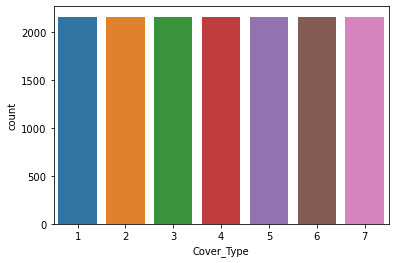

In [6]:
sns.countplot(x='Cover_Type', data=train)

## Numerical variables.

According to the train.html file many of the numerical features do not follow a gaussian distribution.
there will be a transformation for this features, but they will also remain as they are in order to create linear models
or more complex models.


## Continous variables

### Looking for a transformation for the elevation features

Elevation hasta multimodal distribution so in this part i would seak for a transformation that
allow me to transform it to a normalized distribution

<AxesSubplot:>

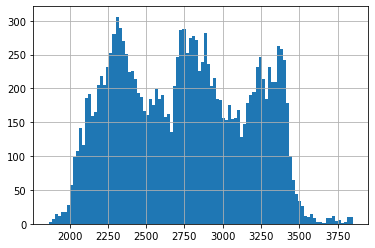

In [7]:
train['Elevation'].hist(bins=100)

In [8]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='normal')
new = qt.fit_transform(train['Elevation'].values.reshape(-1,1))

<AxesSubplot:>

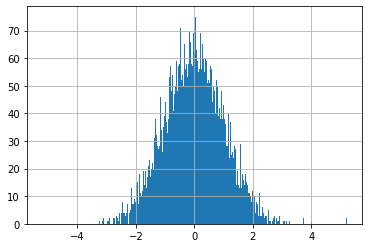

In [9]:
pd.Series({'new': new}).hist(bins=1000)

##### Consideration
It seams that a QuantileTransformer helps with the feature engineering of this feature.

### Slope

#### PowerTransform

In [10]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(train['Slope'].values.reshape(-1,1))

PowerTransformer()

In [11]:
new = pt.transform(train['Slope'].values.reshape(-1,1))
new

array([[-1.99469921],
       [-2.25805002],
       [-0.86037782],
       ...,
       [ 1.01015596],
       [ 1.28500177],
       [ 1.79410442]])

<AxesSubplot:>

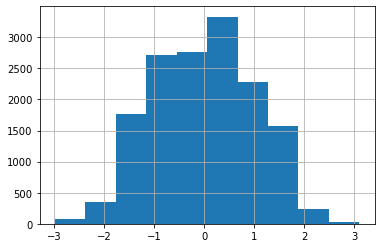

In [12]:
pd.Series({'new': new}).hist(bins=10)


##### Consideration
* if a linear models is gonna be used using yeo-jhonson power transform may help the model.

### Distances
I will try some analysis to check the correspondance of some combinations with this distances.

After checking Both Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology relationship with the class in train.html
it seams ther are some patterns and relationships. For example There is a concentration fo cover types 4 and 6 that are closer in Horizontal
distance to Hydrology, on the counter part the verticar distance also presentes concentration at lower distances
of covery type 1, 4, and 5

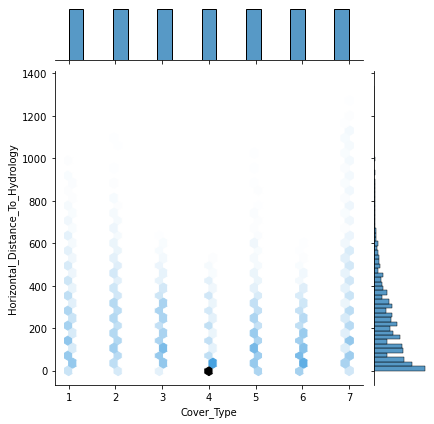

In [13]:
sns.jointplot(data=train, x="Cover_Type", y="Horizontal_Distance_To_Hydrology", kind="hex")


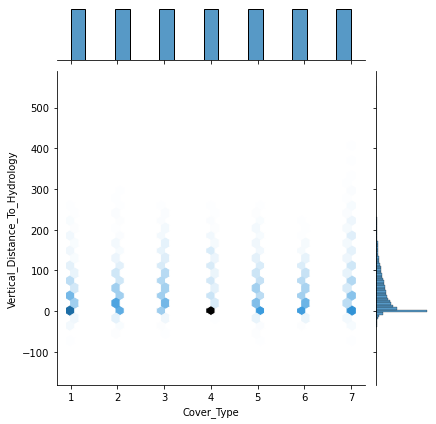

In [14]:
sns.jointplot(data=train, x="Cover_Type", y="Vertical_Distance_To_Hydrology", kind="hex")


In [15]:
import numpy as np
train['euclidian_distance_to_Hydrology'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)

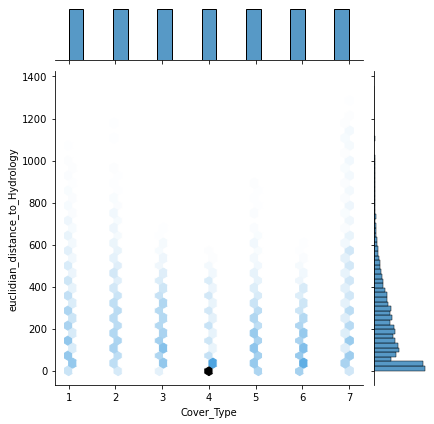

In [16]:
sns.jointplot(data=train, x="Cover_Type", y="euclidian_distance_to_Hydrology", kind="hex")



It seams that calculating the euclidian distance makes the distribution of cover 1, 2, 6 sparse, while the 4 class keeps almost the same

<AxesSubplot:xlabel='euclidian_distance_to_Hydrology', ylabel='Count'>

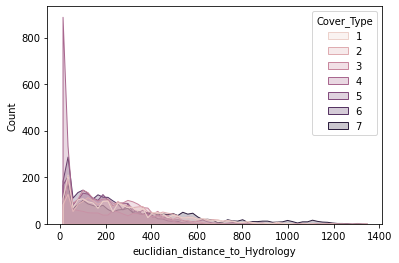

In [17]:
sns.histplot(train, x="euclidian_distance_to_Hydrology", hue="Cover_Type", element="poly")


#### Checking Outliers

Text(0.5, 1.0, 'Boxplot Cover_Type vs Target Class')

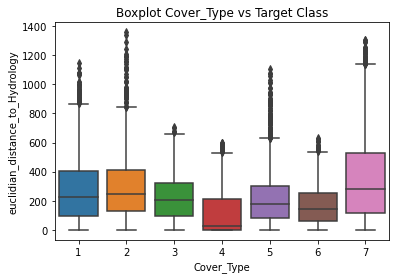

In [18]:
ax = sns.boxplot(x="Cover_Type", y="euclidian_distance_to_Hydrology", data=train)
ax.set_title('Boxplot Cover_Type vs Target Class')

The created feature has some outliers, in all classes, nevere the less it seems that class 4 has the lower values from the data set as well the most concentrated amount of values. It might be a good idea to create bins for this feature.

Nevertheless overall it does´nt seems to be really considerable peaks. or concentration of any of the classes

#### Horizonal_Distance_To_Roadways



In [19]:
from itertools import combinations
import matplotlib.pyplot as plt

def plot_relationship(x_label, y_label):
    """Function to plot the relationship between 2 cover types"""
    unique_covers = train['Cover_Type'].unique()

    combination = combinations(unique_covers, 2)

    for i, x in enumerate(combination):
        plt.figure(i)
        selected = train[(train["Cover_Type"] == x[0]) |
                    (train["Cover_Type"] == x[1])][['Cover_Type',
                                                    x_label,
                                                    y_label]]
        sns.scatterplot(x=selected[x_label],
                    y=selected[y_label],
                    hue=selected['Cover_Type'])


<ipython-input-19-c95b019bbb0e>:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



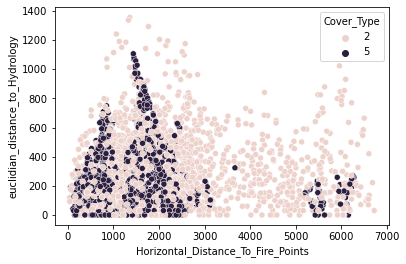

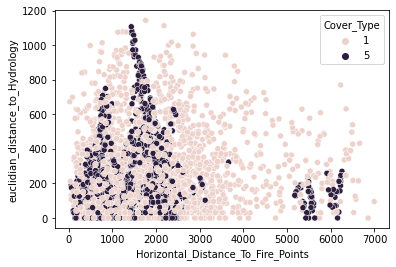

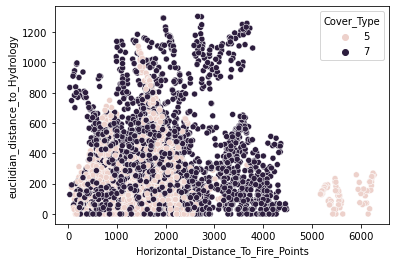

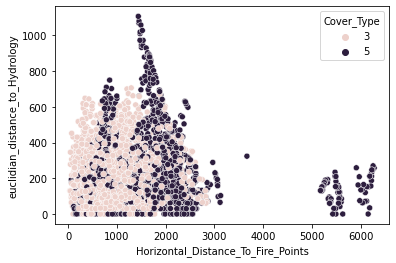

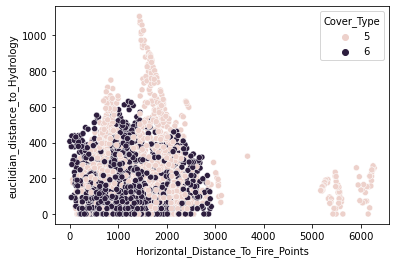

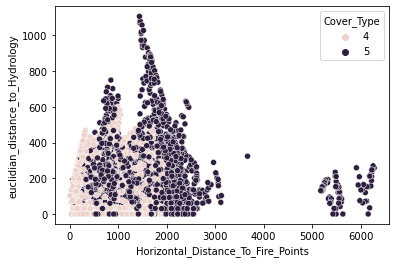

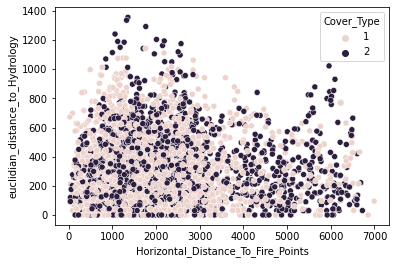

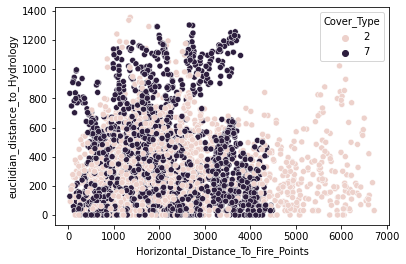

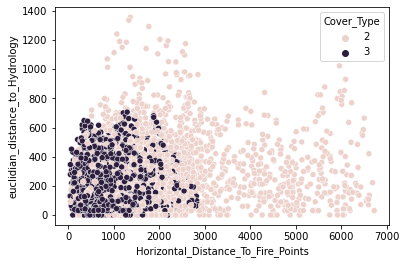

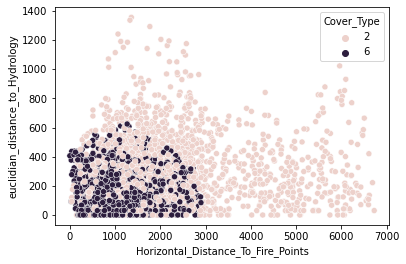

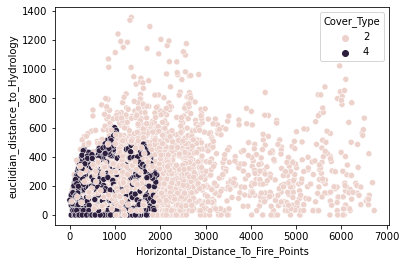

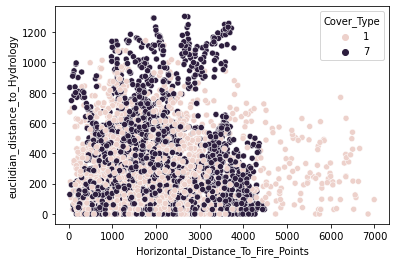

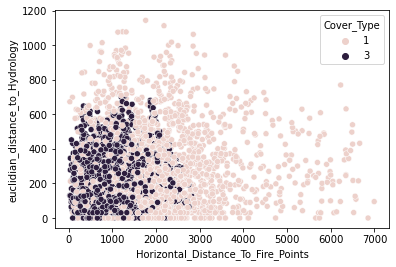

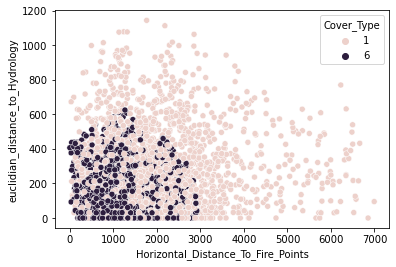

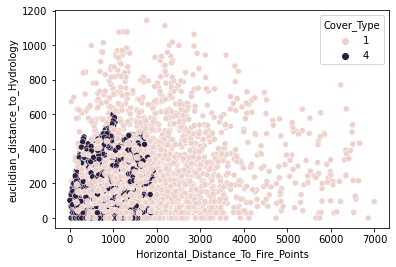

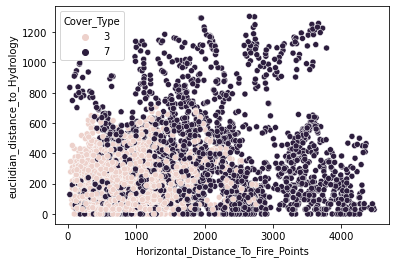

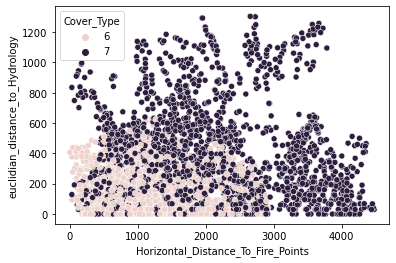

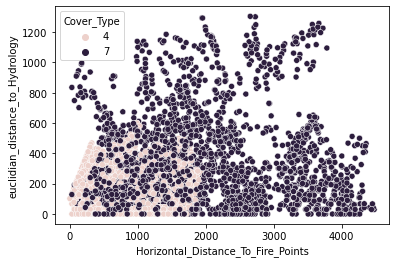

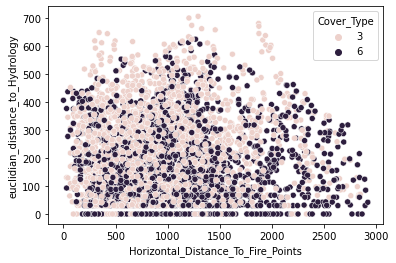

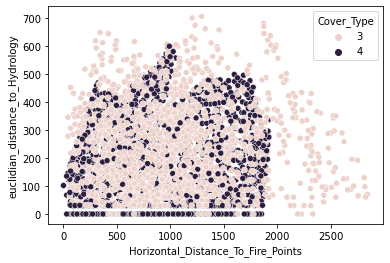

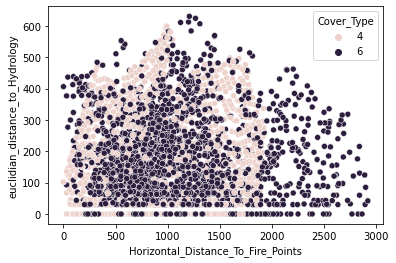

In [20]:
plot_relationship('Horizontal_Distance_To_Fire_Points', 'euclidian_distance_to_Hydrology')

Visualizing cover types with euclidian distance and horizonal distance to fire points ther are some clear clusters for cover types like 2 and 5


<ipython-input-19-c95b019bbb0e>:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



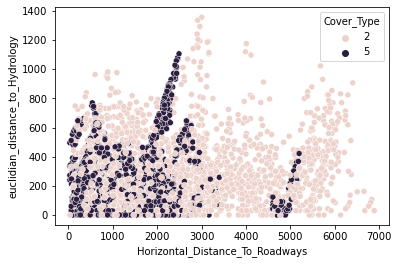

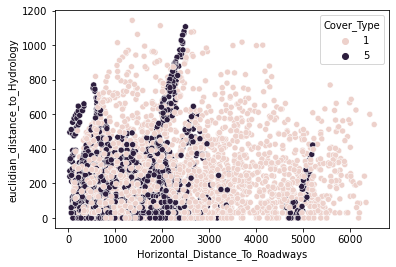

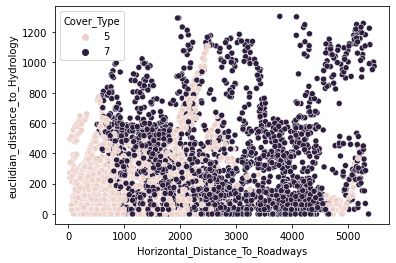

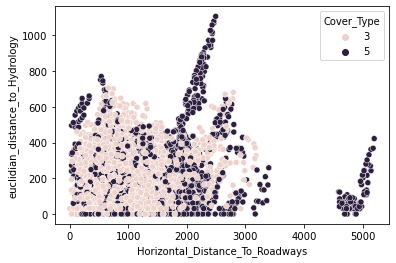

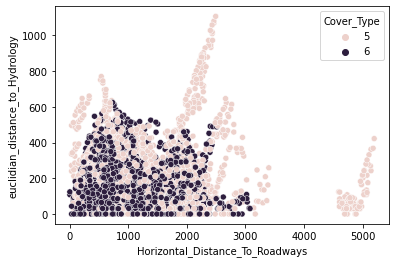

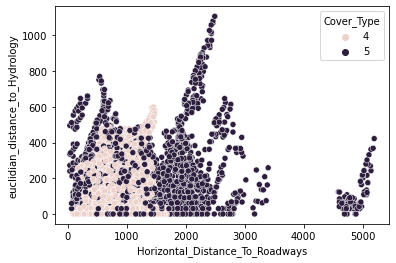

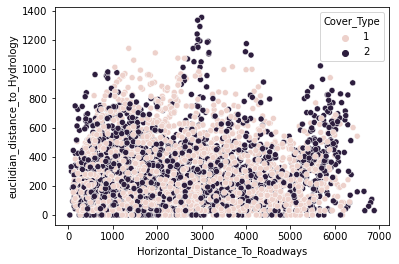

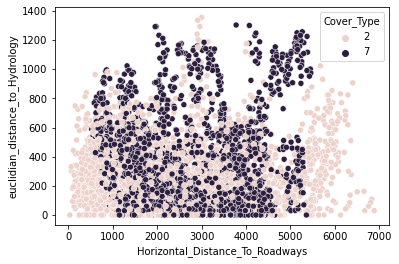

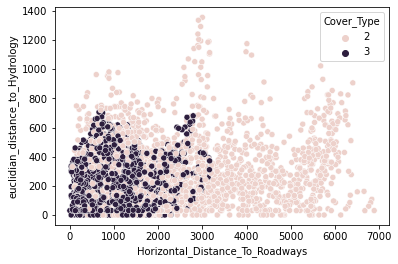

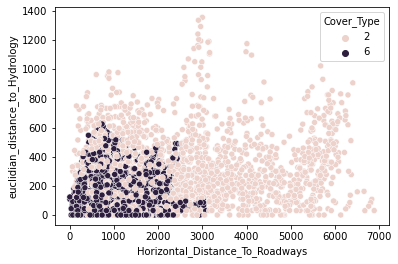

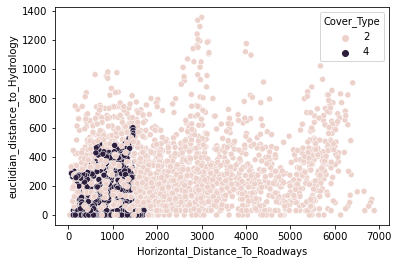

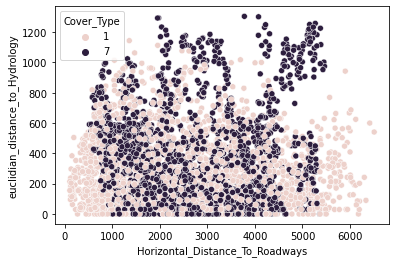

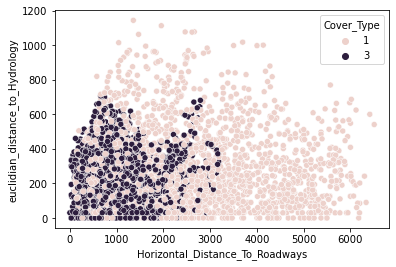

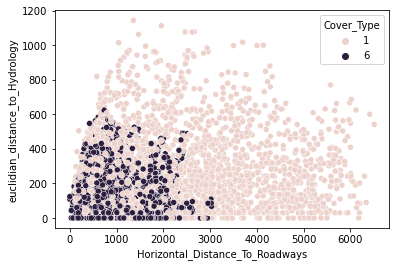

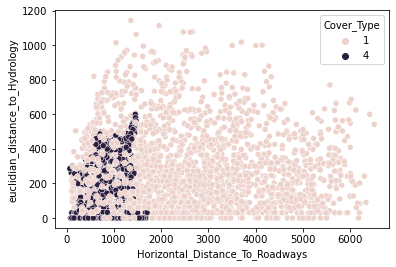

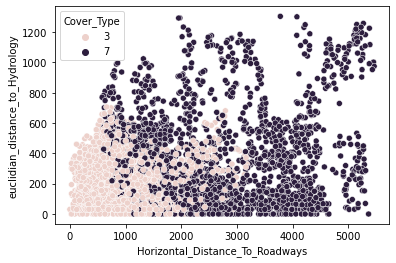

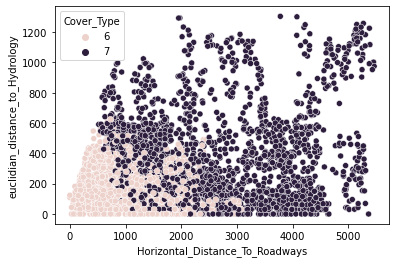

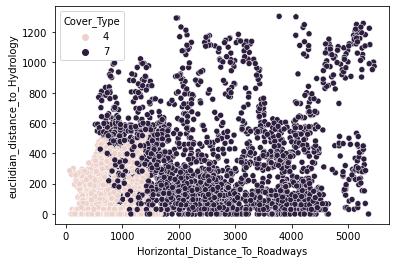

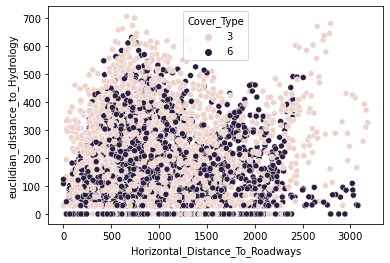

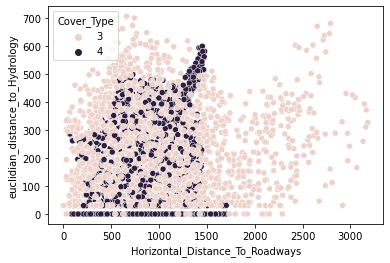

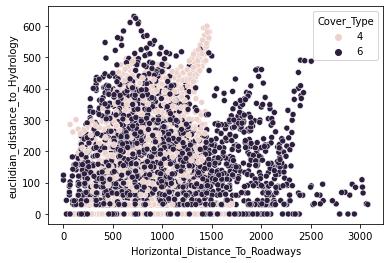

In [21]:
plot_relationship('Horizontal_Distance_To_Roadways', 'euclidian_distance_to_Hydrology')

When looking at Roadways vs euclidian distances it seems that class 5, 2 and 1 create some clusters

##### Consideration
* Add A Transformation to the model in order to Calculate the distance
* If possible create a binning for the new created distance.


### Soil types

D:\Programas\Miniconda\envs\mine_ds_cover_type\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



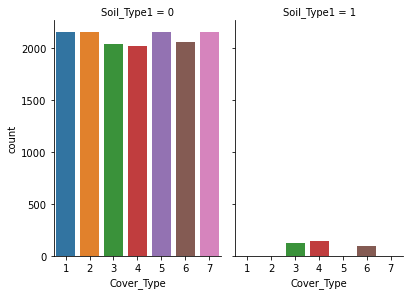

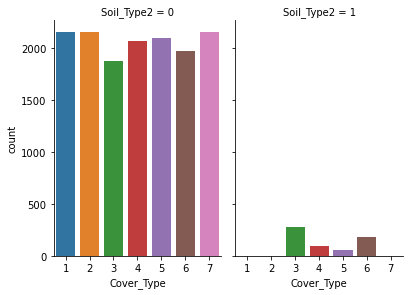

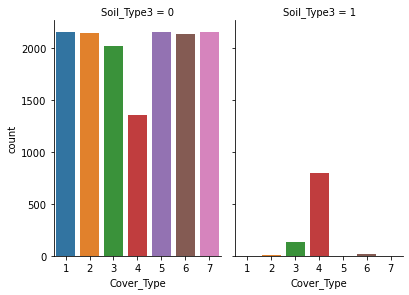

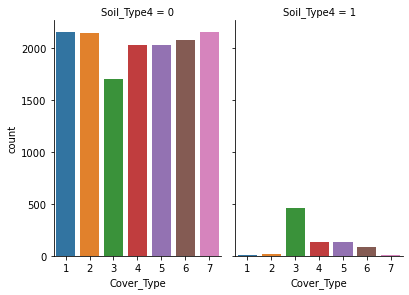

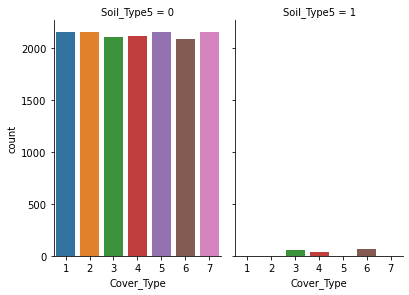

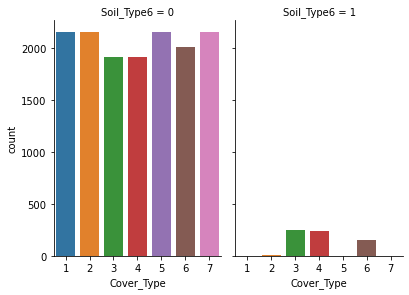

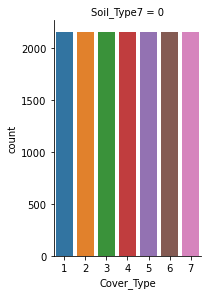

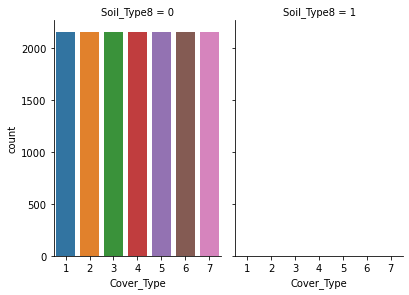

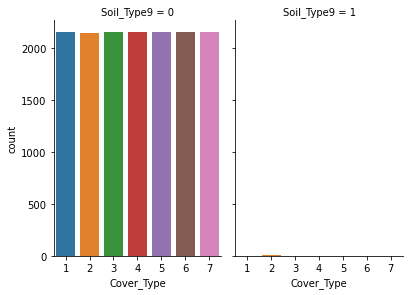

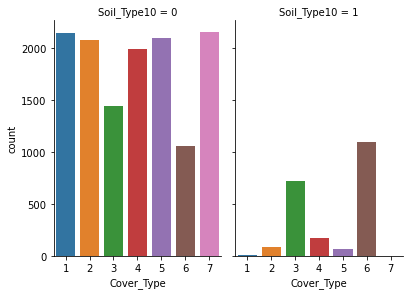

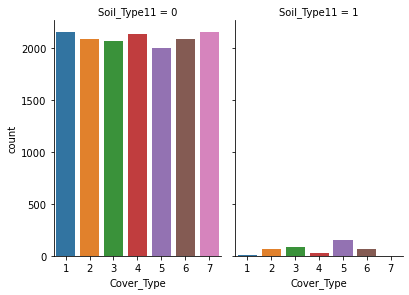

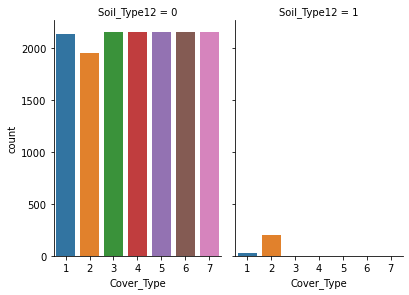

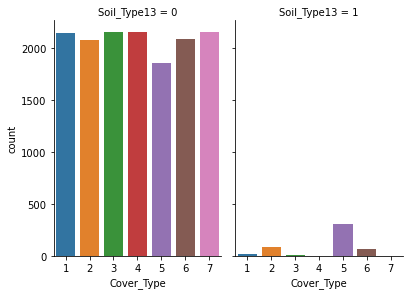

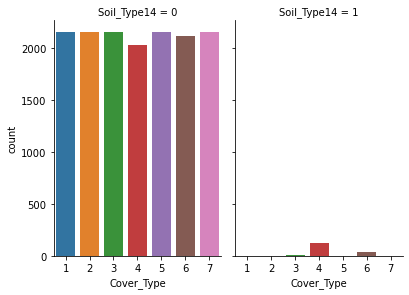

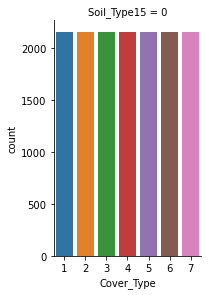

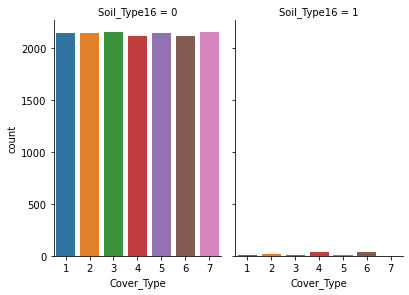

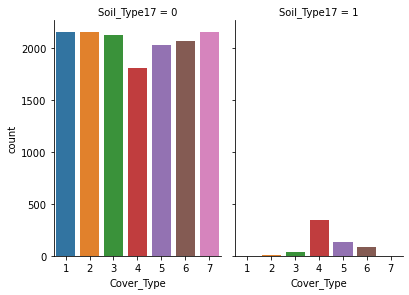

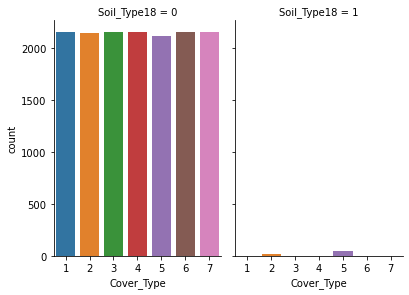

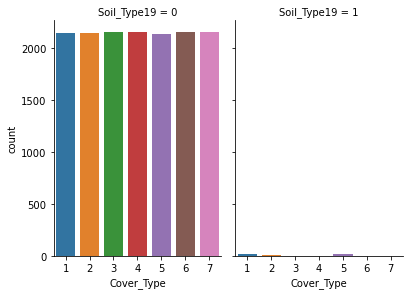

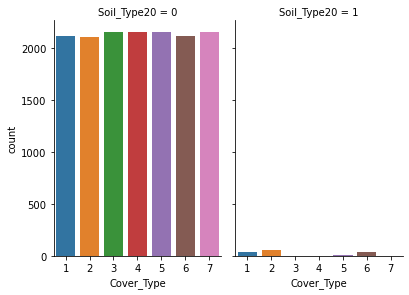

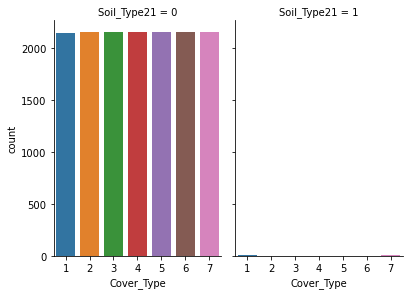

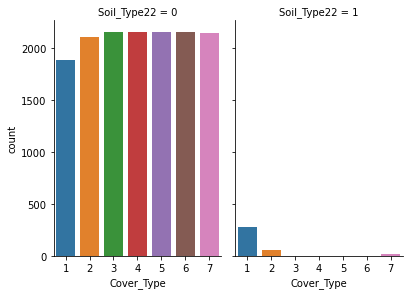

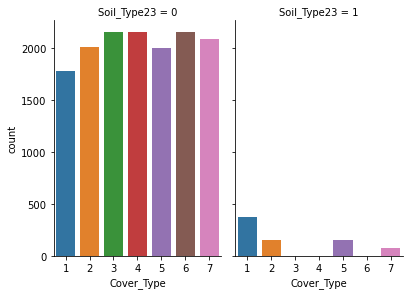

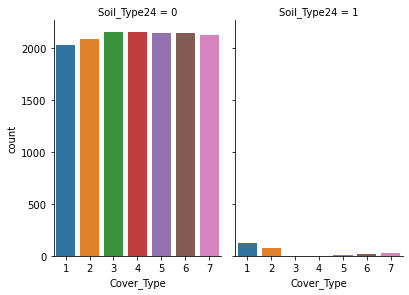

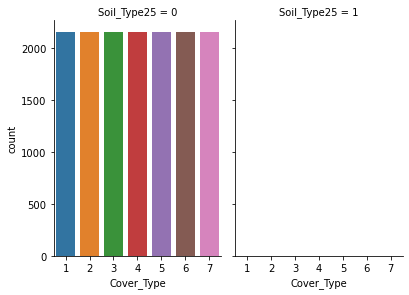

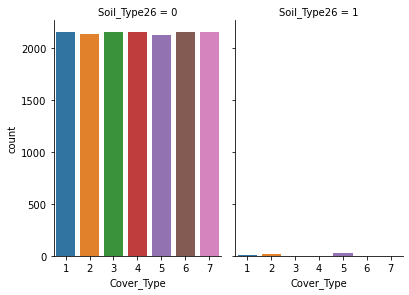

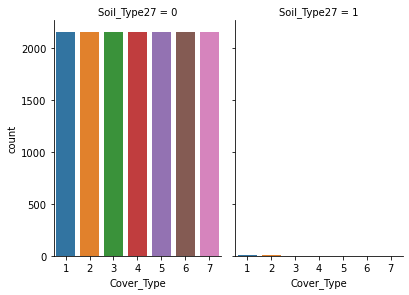

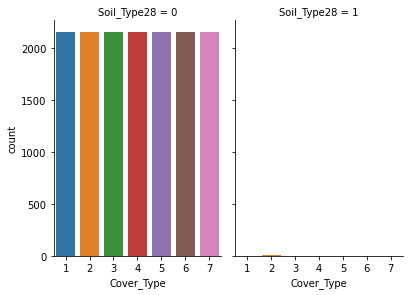

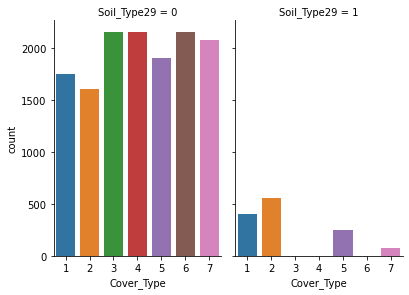

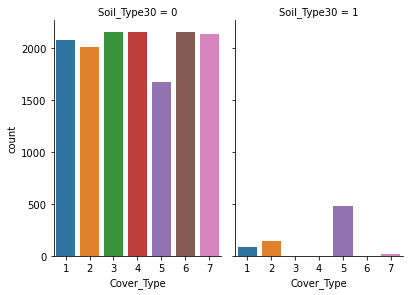

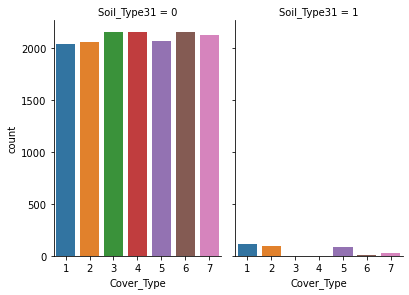

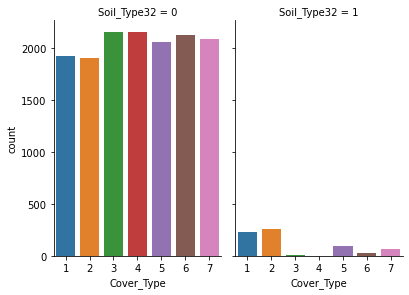

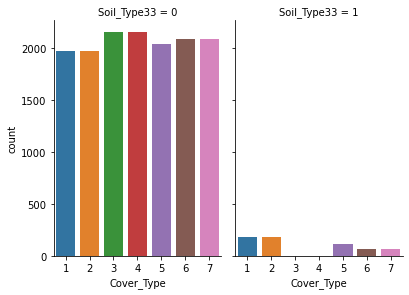

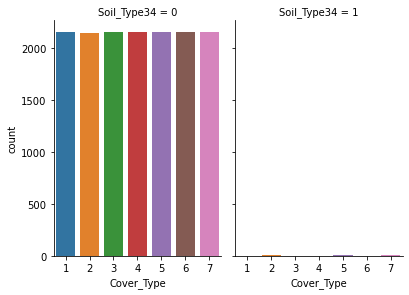

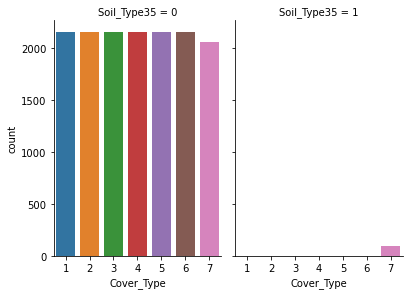

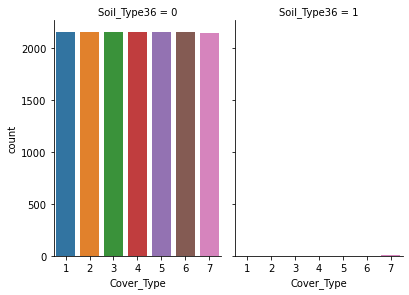

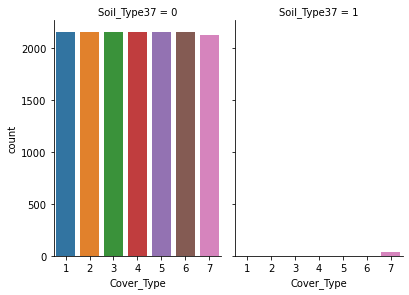

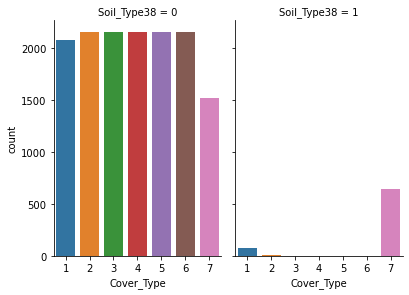

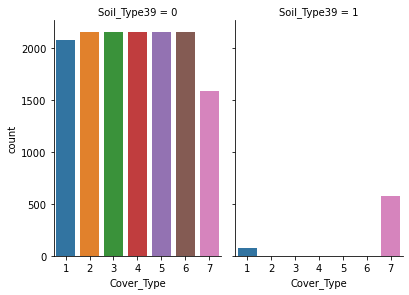

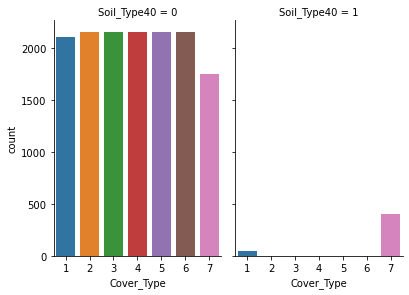

In [22]:
soils = [x for x in train.columns if x.startswith('Soil')]
for soil in soils:
    sns.catplot(x='Cover_Type', col=soil,
                    data=train, kind="count",
                    height=4, aspect=.7);

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
class FromDummiesToCategories(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_operate, new_column_name):
        self.columns = cols_to_operate
        self.new_column_name = new_column_name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X1 = pd.DataFrame(X[self.columns])
        serie = X1.columns[np.where(X1!=0)[1]]
        X[self.new_column_name] = serie
        X.drop(self.columns, axis=1, inplace=True)
        return X

In [42]:
soil_columns = [x for x in train.columns if x.startswith('Soil_Type')]       

In [46]:
new_dataset = FromDummiesToCategories(soil_columns, 'soil_type').fit_transform(train)
new_dataset

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                    6279                 1                 0   
1                                    6225                 1                 0   
2                                    6121                 1                 0   
3                                    6211                 1                 0   
4                                    6172                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Cover_Type  \
0                     0                 0           5   
1                     0                 0           5   
2                     0                 0           2   
3                     0                 0           2   
4                     0                 0           5   
...                 ...               ...         ...   
15115                 1                 0           3   
15116                 1                 0           3   
15117                 1                 0           3   
1511

In [53]:
from matplotlib import pyplot

<ipython-input-62-26e876dc9b64>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



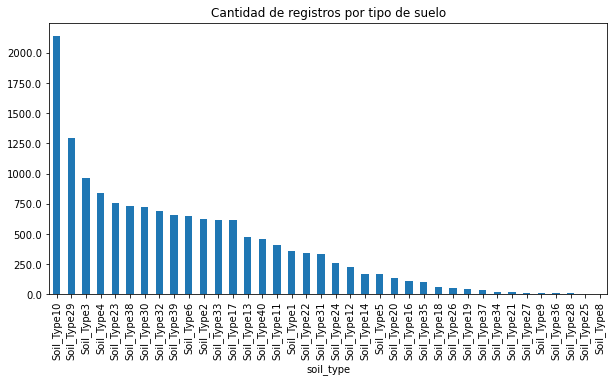

In [62]:
ax = new_dataset.groupby(["soil_type"]).count()['Id'].sort_values(ascending=False)[:100]\
    .plot(kind='bar', figsize=(10,5), title=f"Cantidad de registros por tipo de suelo")
ax.set_yticklabels(ax.get_yticks())
plt.show()

In [63]:
new_dataset['soil_type'].value_counts(normalize=True)

Soil_Type10    0.141667
Soil_Type29    0.085384
Soil_Type3     0.063624
Soil_Type4     0.055754
Soil_Type23    0.050066
Soil_Type38    0.048148
Soil_Type30    0.047950
Soil_Type32    0.045635
Soil_Type39    0.043452
Soil_Type6     0.042989
Soil_Type2     0.041204
Soil_Type33    0.040741
Soil_Type17    0.040476
Soil_Type13    0.031481
Soil_Type40    0.030357
Soil_Type11    0.026852
Soil_Type1     0.023479
Soil_Type22    0.022817
Soil_Type31    0.021958
Soil_Type24    0.016997
Soil_Type12    0.015013
Soil_Type14    0.011177
Soil_Type5     0.010913
Soil_Type20    0.009193
Soil_Type16    0.007540
Soil_Type35    0.006746
Soil_Type18    0.003968
Soil_Type26    0.003571
Soil_Type19    0.003042
Soil_Type37    0.002249
Soil_Type34    0.001455
Soil_Type21    0.001058
Soil_Type27    0.000992
Soil_Type9     0.000661
Soil_Type36    0.000661
Soil_Type28    0.000595
Soil_Type8     0.000066
Soil_Type25    0.000066
Name: soil_type, dtype: float64

##### Consideration
It doesn´t seams that the soils types are relevant in any of the cover types. Althought, for cover Soil_type 10 there are more covers of class 6. But the distribution of the data not only shows an importan cardinality, it shows that the counts of the values is significan on just 5 of the cardinalities taking a 5% of appereaance.

### Wilderness

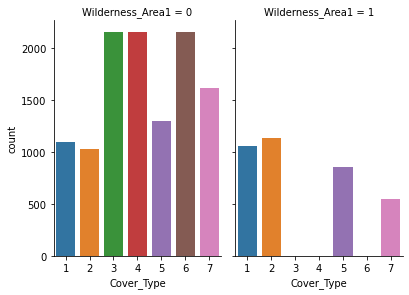

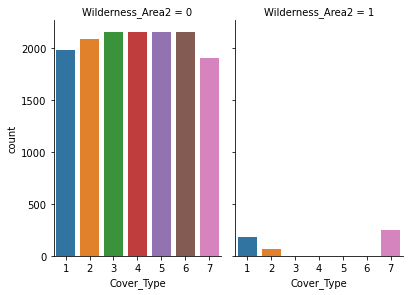

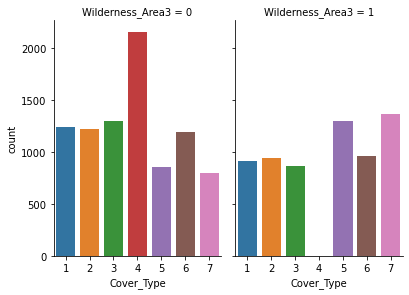

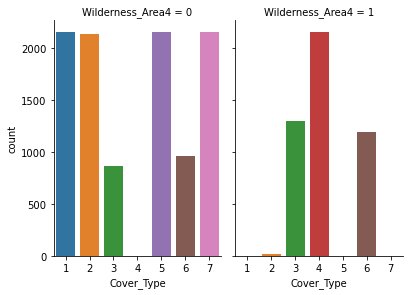

In [23]:
wilderness = [x for x in train.columns if x.startswith('Wild')]
for wilder in wilderness:
    sns.catplot(x='Cover_Type', col=wilder,
                    data=train, kind="count",
                    height=4, aspect=.7);

##### Consideration
It seams that for the category 4 Wilderness is very significant in Wilderness areas 3 an 4.

## Discrete Variables.

Having as background my GIS knowledge i decided not to treat 'Aspect' and the 'Hillshade's features as numerical continuos features, but rather as Discrete.


### Aspect

Aspect has a really high cardinality, then it migh seem a good idea to create some binning and check for possible clusters of the data

In [24]:
from feature_engine.discretisation import EqualWidthDiscretiser


In [25]:
disc = EqualWidthDiscretiser(bins=36, variables=['Aspect'])

In [26]:
disc.fit(train)

EqualWidthDiscretiser(bins=36, variables=['Aspect'])

In [27]:
train_t = disc.transform(train)
train_t['Aspect']

0         5
1         5
2        13
3        15
4         4
         ..
15115    24
15116    12
15117    13
15118    16
15119    19
Name: Aspect, Length: 15120, dtype: int64

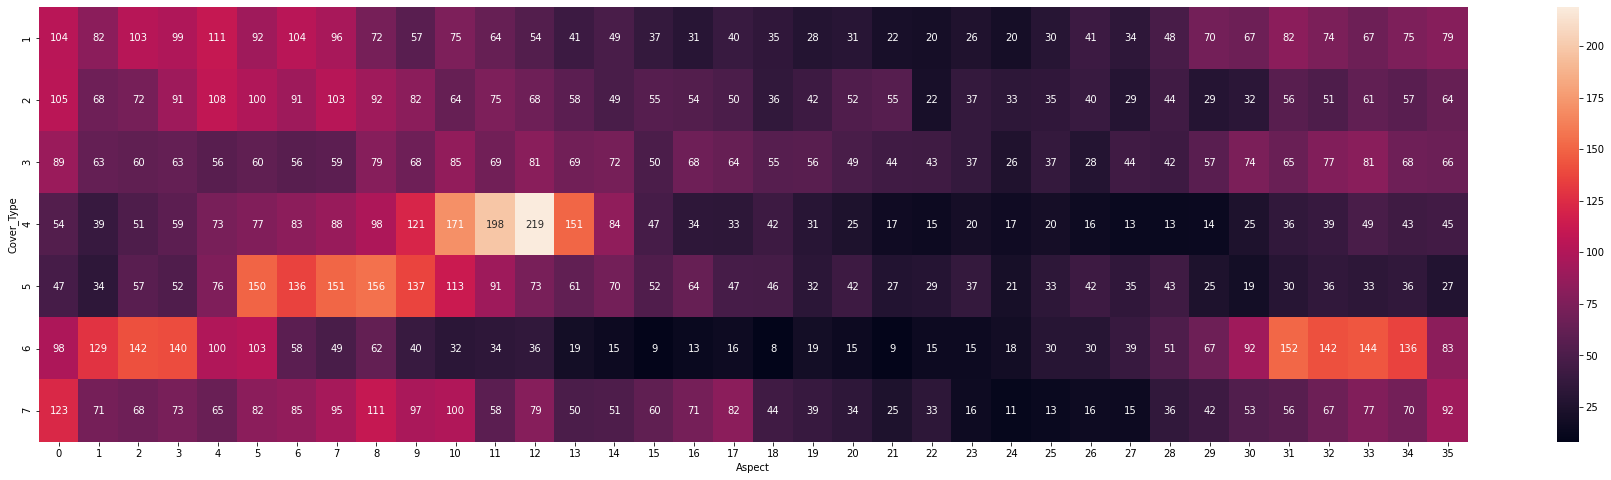

In [28]:
group_aspect_cover_amount = train_t.groupby(by=['Cover_Type', 'Aspect']).count()['Id'].reset_index().rename(columns={'Id': 'Amount'})
group_aspect_cover_amount = group_aspect_cover_amount.pivot('Cover_Type', 'Aspect', "Amount")
fig, ax = plt.subplots(figsize=(32,8))
ax = sns.heatmap(group_aspect_cover_amount,  annot=True, fmt='g')

It looks that this binning helps a little bit with  the visualization of some imformation refering to the Aspect feature. There are some concentration of  cover types for cover types 5, 6, 7, 8. also this binning group in a good way the ammount per cover types. It might be useful to create a new feature with this binning just to check if a model performs better.

##### Consideration
Binning this feature may help, it would be useful to create several binnins just to check. Bins might different but its recommended from 6-12-24-30-36

#### Hillshade

According to train.html the values are from 0 to 255, i will try a 26 binarization transformation for this feature to visualize something

In [29]:
def plot_discrite_and_bin(dataset, variable, bins):
    disc = EqualWidthDiscretiser(bins=bins, variables=[variable])
    disc.fit(dataset)
    train_t = disc.transform(dataset)
    train_t[variable]
    group_aspect_cover_amount = train_t.groupby(by=['Cover_Type', variable]).count()['Id'].reset_index().rename(columns={'Id': 'Amount'})
    group_aspect_cover_amount = group_aspect_cover_amount.pivot('Cover_Type', variable, "Amount")
    fig, ax = plt.subplots(figsize=(32,8))
    ax = sns.heatmap(group_aspect_cover_amount,  annot=True, fmt='g')

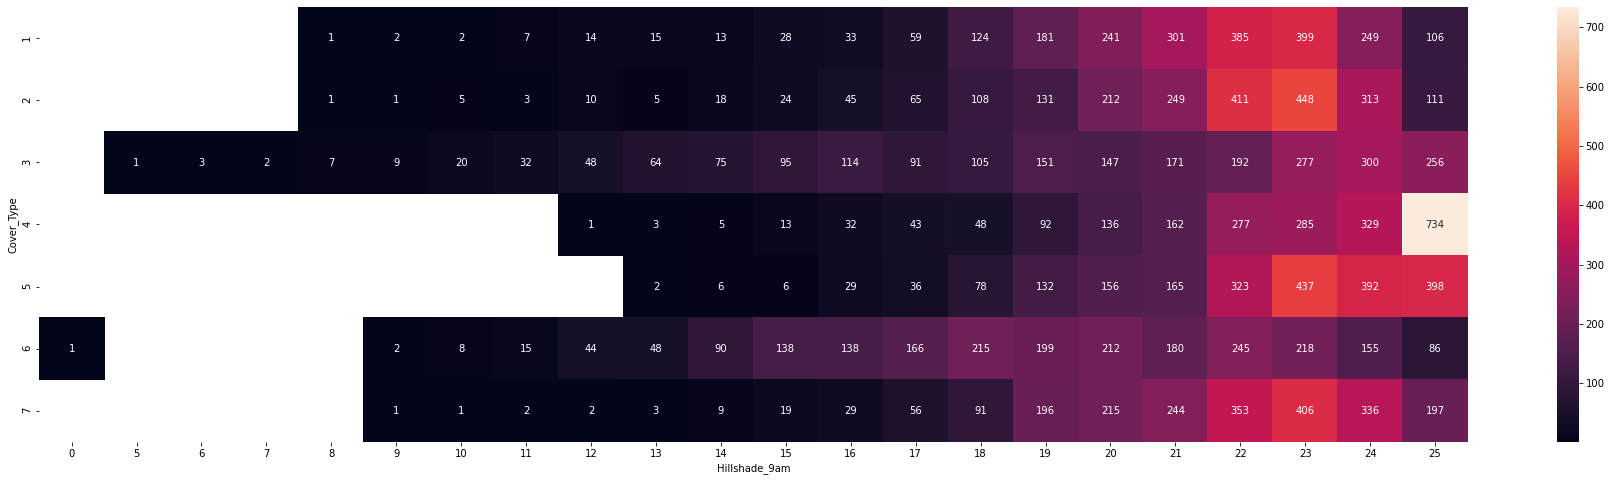

In [30]:
plot_discrite_and_bin(train, 'Hillshade_9am', 26)

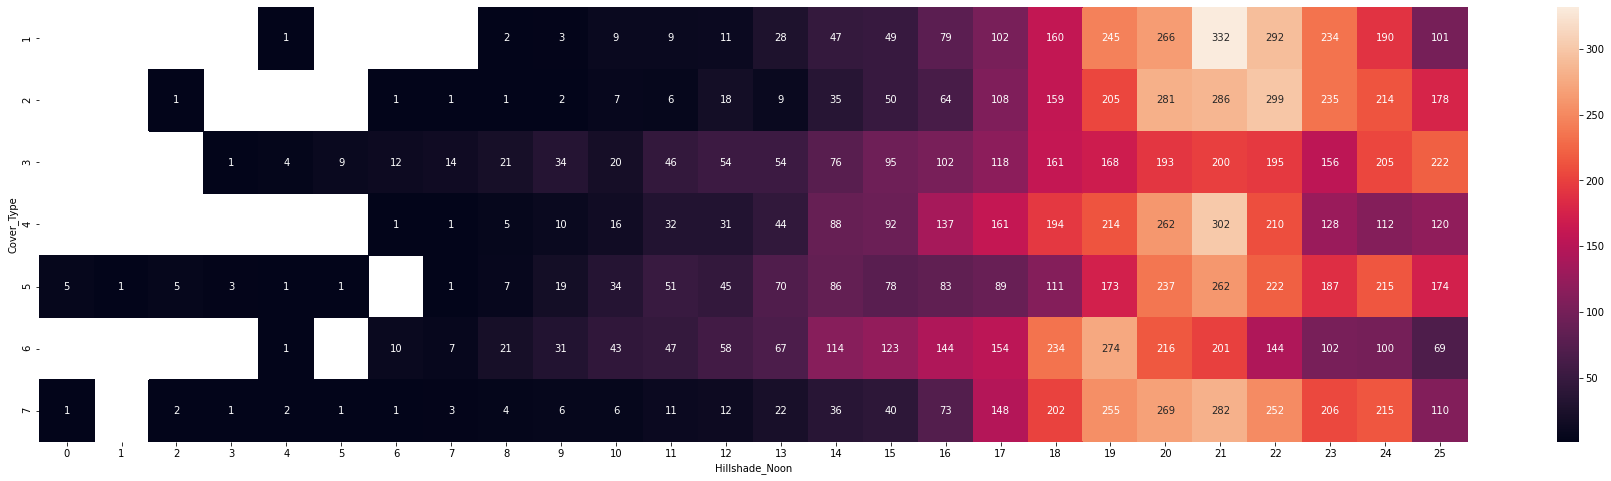

In [31]:
plot_discrite_and_bin(train, 'Hillshade_Noon', 26)

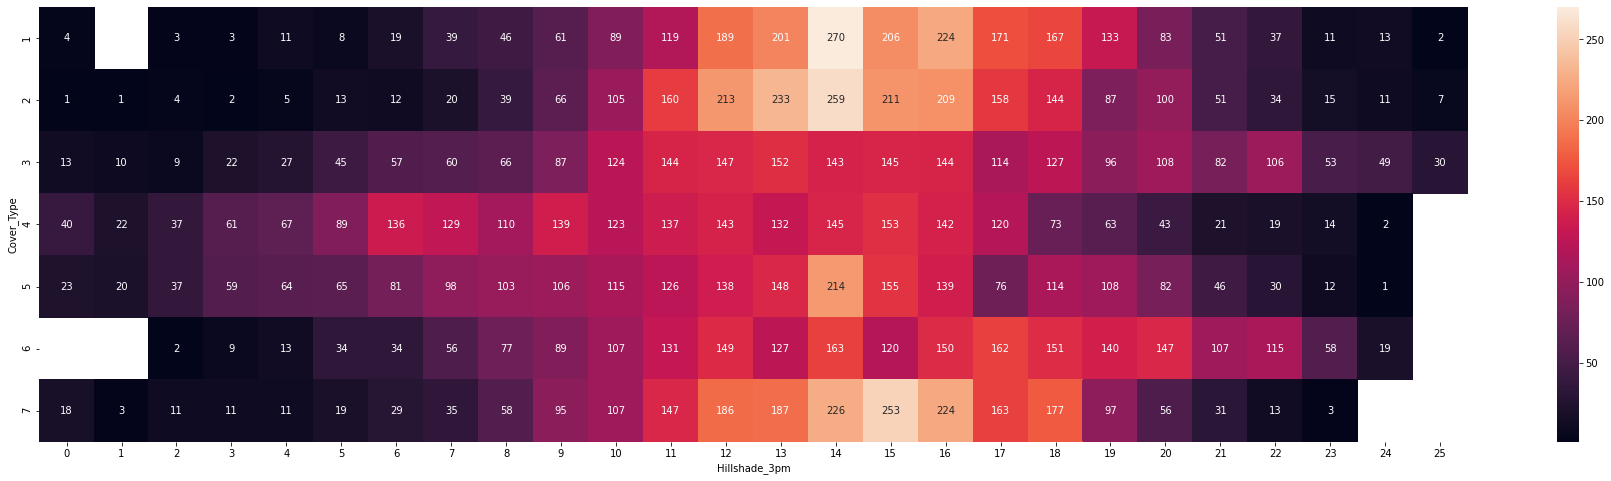

In [32]:
plot_discrite_and_bin(train, 'Hillshade_3pm', 26)

it seems that at all classes the hillshades behave just like the histograms.

##### Consideration
Binning this feature may help, it would be useful to create several binnins just to check.

## General Recomendations
* Create a Transformation for the euclidian distance. That transformation must use the distance formula between Horizontal Distance to Hidrology and Vertical Horizonal Distance To Hidrology
* Drop the identification Column, as well as Soil_Type7 and Soil_Type15 Features as they are constance.
* Verify for all Soil Types the variance, there are several of this features with a very low variance.
* Create a bins for Aspect and hillshades features

### For Linear Models

If a linear models is gonna be use some transformations might be needed, I suggest the following transformation and parameters:

|Feature|Transformation|Parameters|
|-|-|-|
|Elevation|QuantileTransformer|n_quantiles=10,100,1000|
|Slope|PowerTransformer|yeojensen, boxcox|

Given that some features are spread and have long tails it would be good to check a SVM regressor as it might fit the data relative well.